In [27]:
import pandas as pd
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [29]:
print('White wine s shape',white.shape)
print('Red wine s shape',red.shape)

White wine s shape (4898, 12)
Red wine s shape (1599, 12)


In [30]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
# Print info on white wine
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [33]:
# Print info on red wine
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
pd.isnull(white).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
pd.isnull(red).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

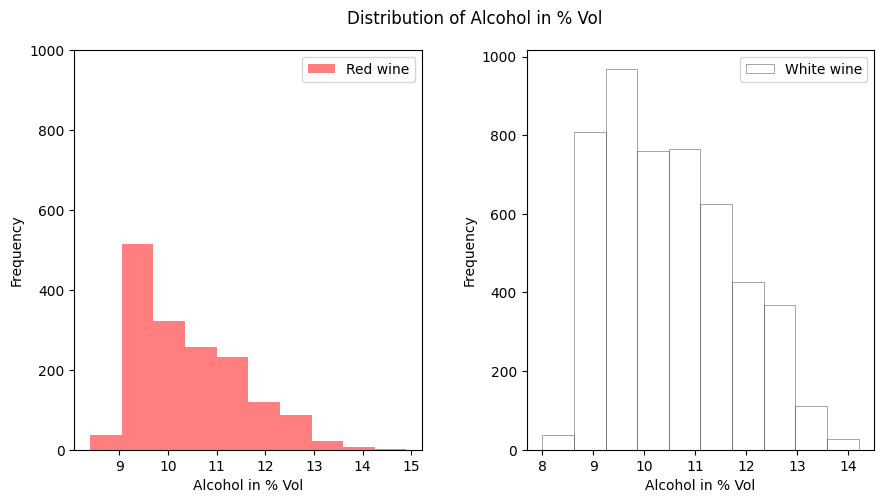

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(red.alcohol, bins=10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, bins=10, facecolor='white', edgecolor="black", linewidth=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.05, wspace=0.3)  
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

In [37]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [38]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [39]:
wines.shape

(6497, 13)

In [40]:
# Specify the data - selecting columns from the DataFrame
X = wines.iloc[:, 0:11]

# Specify the target labels and flatten the array
y = np.ravel(wines['type'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
y_test[0:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [42]:
# Define the scaler 
scaler = StandardScaler()

# Scale the train set
X_train = scaler.fit_transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

### Deep Neural Network

In [68]:
# Define the model architecture
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,))) 

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add another hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                144       
                                                                 
 dense_17 (Dense)            (None, 8)                 104       
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
143/143 [==============================] - 1s 2ms/step - loss: 0.3661 - accuracy: 0.7587
Epoch 2/20
143/143 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9600
Epoch 3/20
143/143 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9848
Epoch 4/20
143/143 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9905
Epoch 5/20
143/143 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9925
Epoch 6/20
143/143 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9938
Epoch 7/20
143/143 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9949
Epoch 8/20
143/143 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9954
Epoch 9/20
143/143 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9947
Epoch 10/20
143/143 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.9956

In [70]:
y_pred[0:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [71]:
# Evaluate the model on the test set
loss_test, acc_test = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: %.3f' % loss_test)
print('Test Accuracy: %.3f' % acc_test)

# Evaluate the model on the train set
loss_train, acc_train = model.evaluate(X_train, y_train, verbose=0)
print('Train Loss: %.3f' % loss_train)
print('Train Accuracy: %.3f' % acc_train)

Test Loss: 0.062
Test Accuracy: 0.994
Train Loss: 0.045
Train Accuracy: 0.997


In [77]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

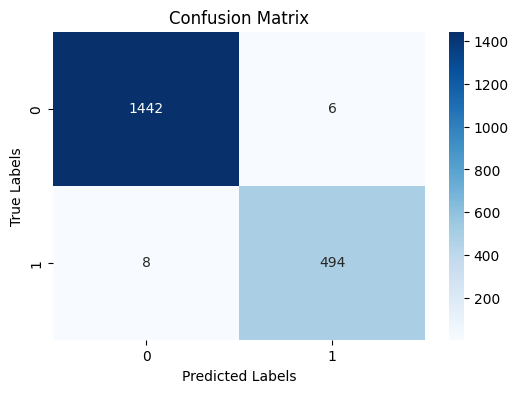

In [78]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

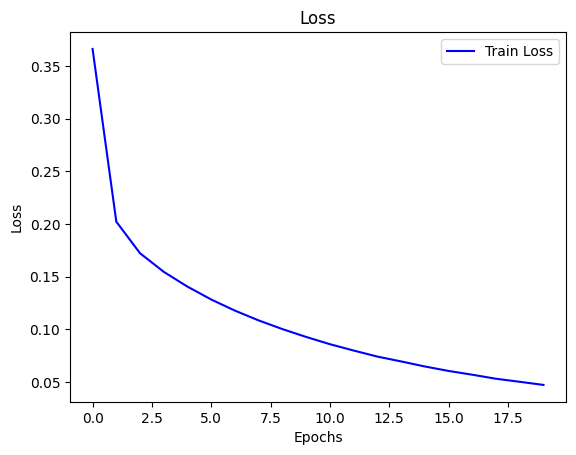

In [79]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()